# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Sesión 6, 2023-10-16/17<br>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

# <font color='#2B17B0'>Librerías a importar</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

# <font color='#2B17B0'>Indice de Precios y Cotizaciones - "IPC" S&P BMV -</font>


> _"El S&P/BMV IPC busca medir el desempeño de las acciones de mayor tamaño y liquidez listadas en la BMV. Su objetivo es proporcionar un índice amplio, representativo, que abarque el mercado bursátil mexicano. Los componentes del índice son ponderados por capitalización de mercado modificada, sujetos a requisitos de diversificación."_<br><br>https://www.spglobal.com/spdji/es/indices/equity/sp-bmv-ipc/#overview


### Universo
> "_Los constituyentes deben de ser acciones listadas en la BMV, excluyendo los Fideicomisos de Inversión en Bienes Raíces (FIBRAS) y los Fideicomisos hipotecarios._"

### Historial de Operación
> _"Deben de cumplir con el siguiente criterio:"_
> * Las acciones deben de tener un historial de negociación por lo menos de tres meses
> * Las acciones deberion de haber operado por lo menos en el 95% de los días de los últimos seis meses
> * Si las acciones tienen menos de seis meses de historial, se aplica al 95% de los días operados

|Emisora|Ticker|Ticker Y!F|
|:-|:-|:-|
|"Indice de Precios y Cotizaciones"|IPC|^MXX|
|Alfa A|ALFAA|ALFAA.MX|
|Alsea A|ALSEA|ALSEA.MX|
|America Movil  B|AMXB|AMXB.MX| 
|Arca Continental|AC|AC.MX| 
|Banco del Bajio|BBAJIOO|BBAJIOO.MX| 
|Becle |CUERVO|CUERVO.MX| 
|Bolsa Mexicana de Valores |BOLSAA|BOLSAA.MX| 
|Cemex CPO|CEMEXCPO|CEMEXCPO.MX| 
|Coca-Cola Femsa  UBL|KOFUBL|KOFUBL.MX| 
|Controladora Vuela Compania de Aviacion |VOLARA|VOLARA.MX| 
|Corporacion Inmobiliaria VestaB. |VESTA|VESTA.MX| 
|El Puerto de Liverpool |LIVEPOLC-1|LIVEPOLC-1.MX| 
|Fomento Economico Mexicano |FEMSAUBD|FEMSAUBD.MX| 
|Genomma Lab Internacional |LABB|LABB.MX| 
|Gentera |GENTERA|GENTERA.MX| 
|Gruma SAB B|GRUMAB|GRUMAB.MX| 
|Grupo Aeroportuario del Centro NorteB. |OMAB|OMAB.MX| 
|Grupo Aeroportuario del PacificoB. |GAPB|GAPB.MX| 
|Grupo Aeroportuario del Sureste  B|ASURB|ASURB.MX| 
|Grupo Bimbo S.A.B.|BIMBOA|BIMBOA.MX| 
|Grupo Carso |GCARSOA1|GCARSOA1.MX| 
|Grupo Cementos de Chihuahua |GCC|GCC.MX| 
|Grupo Elektra |ELEKTRA|ELEKTRA.MX| 
|Grupo Financiero Banorte O|GFNORTEO|GFNORTEO.MX| 
|Grupo Financiero Inbursa O|GFINBURO|GFINBURO.MX| 
|Grupo Mexico  B|GMEXICOB|GMEXICOB.MX| 
|Grupo Televisa  CPO|TLEVISACPO|TLEVISACPO.MX| 
|Industrias Penoles|PE&OLES|PE&OLES.MX| 
|Kimberly Clark de Mexico  A|KIMBERA|KIMBERA.MX| 
|Megacable Holdings |MEGACPO|MEGACPO.MX| 
|ORBIA ADVANCE CORPORATION |ORBIA|ORBIA.MX| 
|Promotora y Operadora de Infraestructura |PINFRA|PINFRA.MX| 
|Qualitas Controladora|Q|Q.MX| 
|Regional |RA|RA.MX| 
|Walmart de Mexico |WALMEX|WALMEX.MX|

# <font color='#2B17B0'>Precios Yahoo Finance</font>

### Como obtener los precios de Y!Finance?

https://query1.finance.yahoo.com/v7/finance/download/WALMEX.MX?period1=1665958992&period2=1697502192&interval=1d&events=history&includeAdjustedClose=true

https://query1.finance.yahoo.com/v7/finance/download/HD.MX?period1=1665966292&period2=1697509492&interval=1d&events=history&includeAdjustedClose=true

https://query1.finance.yahoo.com/v7/finance/download/ALFAA.MX?period1=1665959119&period2=1697502319&interval=1d&events=history&includeAdjustedClose=true

## <font color='#2B17B0'>UNIX Epoch Time</font>


> _"Son los segundos que han pasado a partir de las 0:00:00hrs del 1 de enero, 1970"_

### Importar librería datetime

In [2]:
import datetime

### Epoch 0

In [3]:
datetime.datetime.utcfromtimestamp(0)

datetime.datetime(1970, 1, 1, 0, 0)

In [4]:
datetime.datetime.fromtimestamp(0)

datetime.datetime(1969, 12, 31, 18, 0)

### Comparar los timestamps de los links

### Tiempo Universal Coordinado / Coordinated Universal Time (UTC): Stándard de tiempo en el mundo


UTC es un estándar de tiempo utilizado para sincronizar/coordinar los centros de tiempo alrededor del mundo.  Se utiliza el promedio de dos componentes:
1. Hora Atómica Internacional (**TAI**):  Es una escala de tiempo que combina los resultados de 400 relojes atómicos de gran precisión alrededor del mundo
1. Hora Universal (**UT1**):  También conocido como tiempo astronómico o solar referente a la rotación de la tierra.  Compara el paso marcado por **TAI** y la duración actual de un día en la tierra.

### UTC es un estándard no una zona horaria
GMT es la Zona Horaria de Greenwich.  

## <font color='#2B17B0'>Crear función para obtener precios de acciones</font>


In [5]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/WALMEX.MX?period1=1665958992&period2=1697502192&interval=1d&events=history&includeAdjustedClose=true'
pd.read_csv(url)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-17,71.849998,72.190002,70.800003,71.040001,69.611580,13727345.0
1,2022-10-18,71.480003,72.059998,71.129997,71.500000,70.062325,20296115.0
2,2022-10-19,71.449997,71.839996,70.709999,71.180000,69.748756,13842961.0
3,2022-10-20,71.470001,73.290001,70.510002,73.070000,71.600761,20259907.0
4,2022-10-21,73.000000,75.099998,71.449997,74.750000,73.246979,20957087.0
...,...,...,...,...,...,...,...
248,2023-10-10,60.709999,63.340000,60.610001,62.560001,62.560001,21558353.0
249,2023-10-11,62.520000,62.590000,61.349998,61.759998,61.759998,37863707.0
250,2023-10-12,61.810001,62.509998,61.310001,61.389999,61.389999,17263783.0
251,2023-10-13,61.790001,61.840000,59.680000,59.930000,59.930000,20070309.0


In [11]:
fecha1 = '2020-01-01'
fecha2 = '2023-10-13'

In [13]:
fecha1 = datetime.datetime.strptime(fecha1, "%Y-%m-%d").strftime('%s')
fecha2 = datetime.datetime.strptime(fecha2, "%Y-%m-%d").strftime('%s')

In [35]:
accion = 'walmex.mx'
intervalo = '1d'  #1mo

### f-string

In [49]:
url =f'https://query1.finance.yahoo.com/v7/finance/download/{accion}?period1={fecha1}&period2={fecha2}&interval={intervalo}&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       956 non-null    object 
 1   Open       955 non-null    float64
 2   High       955 non-null    float64
 3   Low        955 non-null    float64
 4   Close      955 non-null    float64
 5   Adj Close  955 non-null    float64
 6   Volume     955 non-null    float64
dtypes: float64(6), object(1)
memory usage: 52.4+ KB


In [51]:
df['Date'] = pd.to_datetime(df['Date'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       956 non-null    datetime64[ns]
 1   Open       955 non-null    float64       
 2   High       955 non-null    float64       
 3   Low        955 non-null    float64       
 4   Close      955 non-null    float64       
 5   Adj Close  955 non-null    float64       
 6   Volume     955 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 52.4 KB


In [53]:
df.set_index('Date', inplace=True)

In [54]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,54.200001,55.330002,53.880001,55.119999,52.371132,7718655.0
2020-01-03,55.049999,55.290001,54.349998,54.689999,51.962566,14207686.0
2020-01-06,54.509998,55.689999,54.220001,55.275002,52.518398,14180785.0
2020-01-07,55.259998,55.570000,54.590000,54.980000,52.238117,16292401.0
2020-01-08,54.980000,55.990002,54.599998,55.709999,52.931705,10485032.0
...,...,...,...,...,...,...
2023-10-06,64.949997,65.000000,63.340000,63.799999,63.799999,12455254.0
2023-10-09,63.490002,63.490002,60.410000,60.619999,60.619999,21424372.0
2023-10-10,60.709999,63.340000,60.610001,62.560001,62.560001,21558353.0


FUNCION EN NUESTRA LIBRERIA HERRAMIENTAS

def precios(accion, fecha1, fecha2, periodo='1d'):
    nombres_columnas = {
        'Date':'fecha',
        'Adj Close':'cierre_ajustado'
    }
    
    fecha1 = datetime.datetime.strptime(fecha1, "%Y-%m-%d").strftime('%s')
    fecha2 = datetime.datetime.strptime(fecha2, "%Y-%m-%d").strftime('%s')
    
    url_ = f'https://query1.finance.yahoo.com/v7/finance/download/{accion}?period1={fecha1}&period2={fecha2}&interval={periodo}&events=history&includeAdjustedClose=true'
    df_ = pd.read_csv(url_)
    df_.rename(columns=nombres_columnas, inplace=True)
    df_['fecha'] = pd.to_datetime(df_['fecha'])
    df_.set_index('fecha', inplace=True)
    
    df_.drop(columns=['Open', 'High', 'Low',  'Close'], inplace=True)
    
    return df_    

In [71]:
import herramientas_financieras as hf

In [74]:
%load_ext autoreload
%autoreload 2

In [75]:
hf.precios('walmex.mx', '2020-10-01', '2023-10-16')

,cierre_ajustado,Volume
fecha,,
2020-10-01,50.404861,23258941.0
2020-10-02,49.621914,31373727.0
2020-10-05,49.602810,13435090.0
2020-10-06,49.946548,7870546.0
2020-10-07,49.994286,10237670.0
...,...,...
2023-10-09,60.619999,21424372.0
2023-10-10,62.560001,21558353.0
2023-10-11,61.759998,37863707.0


## Utilizar f String

### Fechas a Epoch Timestamp

### Definir variable `accion`

### Indexar columna `Date`

## Función `precios`

## Guardar función en nuestra librería y recargarlas en automático:

In [79]:
df = hf.precios('walmex.mx', '2020-10-01', '2023-10-16')
df

,cierre_ajustado,Volume
fecha,,
2020-10-01,50.404865,23258941.0
2020-10-02,49.621910,31373727.0
2020-10-05,49.602810,13435090.0
2020-10-06,49.946548,7870546.0
2020-10-07,49.994289,10237670.0
...,...,...
2023-10-09,60.619999,21424372.0
2023-10-10,62.560001,21558353.0
2023-10-11,61.759998,37863707.0


## <font color='#2B17B0'>Retornos logarítmicos</font>


> _En el trading algorítmico, la precisión y consistencia determinan el éxito. Los retornos logarítmicos son preferidos porque brindan ventajas significativas al analizar rendimientos a través de diversos períodos_

* __Aditividad Temporal__: Los retornos logarítmicos son aditivos en el tiempo. puedes sumarlos para obtener el retorno logarítmico total durante todo el período. Esto no es el caso con los retornos algebraicos.
* __Menor Varianza__:tienden a tener una varianza menor que los retornos algebraicos, lo que los hace más estables para el análisis estadístico.
* __Distribución Normal__: Para muchos modelos financieros, se supone que los retornos se distribuyen de manera normal. Los retornos logarítmicos tienen más probabilidades de exhibir este comportamiento en comparación con los retornos algebraicos, especialmente para activos con oscilaciones significativas de precios.
* __Conveniencia Matemática__: Al trabajar con productos y proporciones (comunes en modelos financieros), los retornos logarítmicos simplifican los cálculos, especialmente al usar herramientas matemáticas como el movimiento browniano geométrico en el modelo Black-Scholes.

In [80]:
df.head()

,cierre_ajustado,Volume
fecha,,
2020-10-01,50.404865,23258941.0
2020-10-02,49.621910,31373727.0
2020-10-05,49.602810,13435090.0
2020-10-06,49.946548,7870546.0
2020-10-07,49.994289,10237670.0


In [81]:
df['ret'] = np.log(df['cierre_ajustado']/df['cierre_ajustado'].shift(1))

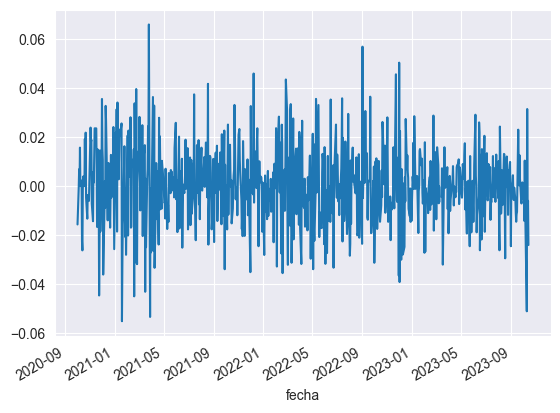

In [83]:
df['ret'].plot();

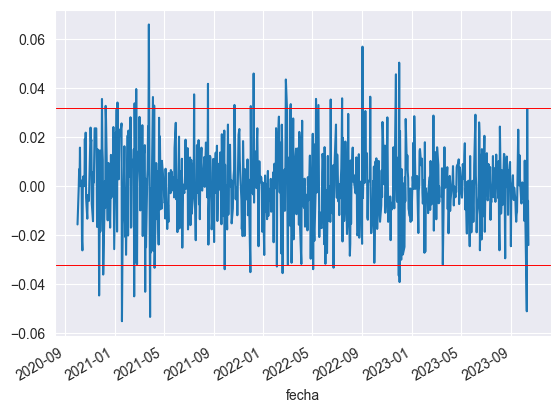

In [85]:
df['ret'].plot()
plt.axhline((2*df['ret'].std()), c='r', lw=.7)
plt.axhline((-2*df['ret'].std()), c='r', lw=.7);

## Comparar 2 o más acciones

### Crear DataFrame con 2 o más precios de cierre de diferentes acciones

In [92]:
list_acciones = ['^MXX', 'walmex.mx', 'chdrauib.mx', 'sorianab.mx']

cierres = pd.DataFrame()

for accion in list_acciones:
    df = hf.precios(accion, '2020-01-01', '2023-10-16')
    cierres[accion] = df['cierre_ajustado']
    del df

In [93]:
cierres

,^MXX,walmex.mx,chdrauib.mx,sorianab.mx
fecha,,,,
2020-01-02,44437.230469,52.371124,26.687458,24.256420
2020-01-03,44624.851563,51.962574,26.040722,24.510210
2020-01-06,44495.300781,52.518402,25.826727,24.134407
2020-01-07,44157.808594,52.238117,25.717354,24.402838
2020-01-08,44470.910156,52.931709,25.869526,24.207615
...,...,...,...,...
2023-10-09,49297.148438,60.619999,100.000000,29.340000
2023-10-10,50289.859375,62.560001,103.010002,29.020000
2023-10-11,50344.738281,61.759998,103.870003,29.850000


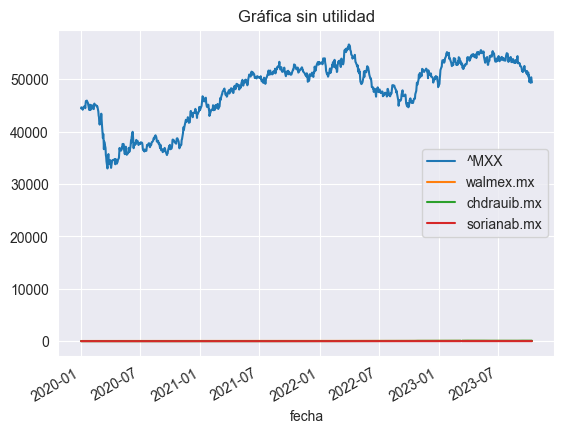

In [94]:
cierres.plot(title='Gráfica sin utilidad');

In [97]:
normalizado_base1 = cierres/cierres.iloc[0,:]

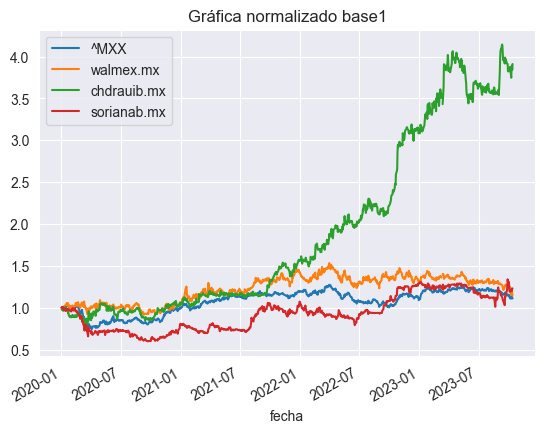

In [99]:
normalizado_base1.plot(title='Gráfica normalizado base1');

In [101]:
normalizado_base0 = cierres/cierres.iloc[0,:] - 1

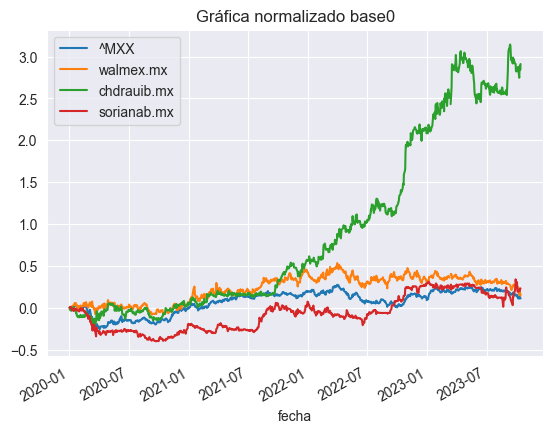

In [102]:
normalizado_base0.plot(title='Gráfica normalizado base0');

### Normalizado de series de tiempo: Comparar 2 o más acciones

## Algoritmo Promedios Móviles

Un promedio móvil es una técnica que calcula el promedio de un conjunto de datos a lo largo de un período específico, que se actualiza constantemente a medida que pasa el tiempo. Por ejemplo, en el caso de los precios de cierre de una acción, un promedio móvil de 20 días calcula el promedio de los precios de cierre de los últimos 20 días. Con cada día que pasa, se elimina el dato correspondiente al día más antiguo de los 20 y se incorpora el precio del día más reciente. De esta forma, el promedio móvil siempre refleja el precio promedio de las últimos 20 días.<br><br>

In [152]:
df = hf.precios('walmex.mx', '2020-01-01', '2023-10-16')

### Cálculo de los promedios móviles

Referencia sobre la función `rolling` de pandas:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [153]:
pm1 = 21
pm2 = 100

df['pm1'] = df['cierre_ajustado'].rolling(pm1).mean()
df['pm2'] = df['cierre_ajustado'].rolling(pm2).mean()

<Axes: xlabel='fecha'>

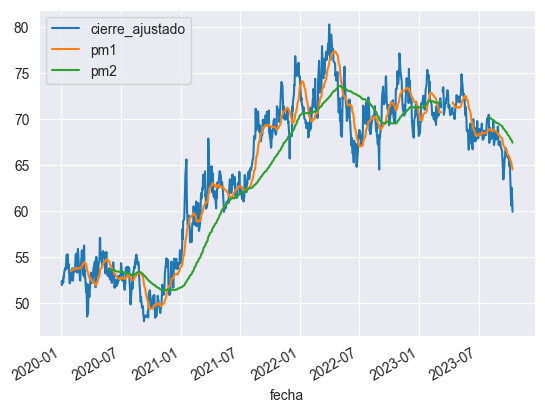

In [154]:
df[['cierre_ajustado', 'pm1', 'pm2']].plot()

### Calcular posicion en el mercado

Ventas en corto permitidas:
La estrategia consiste en tomar posiciones "long" o "short" al cruce de los PMs:
* Long: PM1 > PM2 $\longrightarrow$ __1__
* Short: PM1 < PM2 $\longrightarrow$ __-1__

Ventas en corto no permitidas:
* Long: PM1 > PM2 $\longrightarrow$ __1__
* Out:   PM1 < PM2 $\longrightarrow$ **0**

El utilizar números nos permite:
* Visualizar posición en el mercado de acuerdo a los crueces de lospromedios móviles
* Calcular los retornos de de la estrategia

#### Cálculo de posición del mercado utilizando ventas en corto

In [155]:
df['posicion'] = np.where(df['pm1'] > df['pm2'], 1, -1)

In [156]:
df.dropna(inplace=True)
df

,cierre_ajustado,Volume,pm1,pm2,posicion
fecha,,,,,
2020-05-27,53.805824,11796907.0,54.561854,53.600073,1
2020-05-28,53.074223,15507251.0,54.371376,53.607104,1
2020-05-29,52.589653,41950966.0,54.156466,53.613375,1
2020-06-01,53.653805,7841699.0,54.088599,53.624729,1
2020-06-02,52.599163,23387465.0,53.985895,53.628339,1
...,...,...,...,...,...
2023-10-09,60.619999,21424372.0,65.274285,67.782600,-1
2023-10-10,62.560001,21558353.0,65.085238,67.695300,-1
2023-10-11,61.759998,37863707.0,64.892857,67.607800,-1


In [157]:
df['ret'] = np.log(df['cierre_ajustado']/df['cierre_ajustado'].shift(1))

In [158]:
df['ret_estr'] = df['ret'] * df['posicion'].shift(1)

In [159]:
df

,cierre_ajustado,Volume,pm1,pm2,posicion,ret,ret_estr
fecha,,,,,,,
2020-05-27,53.805824,11796907.0,54.561854,53.600073,1,NaN,NaN
2020-05-28,53.074223,15507251.0,54.371376,53.607104,1,-0.013690,-0.013690
2020-05-29,52.589653,41950966.0,54.156466,53.613375,1,-0.009172,-0.009172
2020-06-01,53.653805,7841699.0,54.088599,53.624729,1,0.020033,0.020033
2020-06-02,52.599163,23387465.0,53.985895,53.628339,1,-0.019852,-0.019852
...,...,...,...,...,...,...,...
2023-10-09,60.619999,21424372.0,65.274285,67.782600,-1,-0.051128,0.051128
2023-10-10,62.560001,21558353.0,65.085238,67.695300,-1,0.031501,-0.031501
2023-10-11,61.759998,37863707.0,64.892857,67.607800,-1,-0.012870,0.012870


Referencia sobre función `where` de numpy:
https://numpy.org/doc/stable/reference/generated/numpy.where.html

#### <font color='navygray'>Visualizar posiciones en el mercado</font>

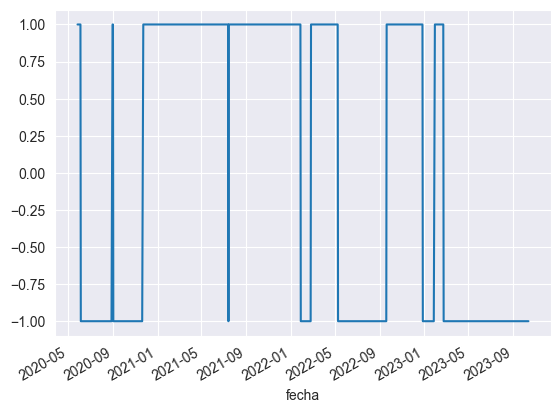

In [160]:
df['posicion'].plot();

### Retornos del mercado Vs Estrategia PMs

In [161]:
print(f"Estrategia mercado: {df['ret'].sum()}")
print(f"Estrategia Promedios Moviles {pm1} y {pm2} dias {df['ret_estr'].sum()}")

Estrategia mercado: 0.10779550037316227
Estrategia Promedios Moviles 21 y 100 dias -0.1353149331316811


### Visualizar desempeño

### <font color='navygray'>Balance monetario</font>

### Balance: Máximos

### Balance: Perdidas

### Encontrar pérdida máxima

#### dentificar la mayor perdida

#### Encontrar fecha

#### Identificar valor del pico máximo en la fecha de la mayor perdida

#### Identificar balance en la fecha de la mayor pérdida

## <font color='navygray'>Cual es la mejor combinación para los promedios móviles?</font>

# <font color='navygray'>ALGORITMO BASADO EN BANDAS DE BOLLINGER</font>

La técnica fue desarrollada por John Bollinger.  Y consiste en colocar una banda superior y una ineferior alrededor de un promedio móvil.  Por lo general el promedio móvil de las Bandas de Bollinger, tiene una ventana de 20 días.  La distancia entre las bandas y el promedio móvil son dos desviaciones estándar o  $2\sigma$.  Al utilizar $2\sigma$ nos aseguramos que el $95%$ de los datos de los precios están entre las dos bandas.  Se concidera que el precio de la acción está sobrevaluado, cuando toca la banda superior y subvaluado cuando toca la banda inferior.

In [185]:
df = hf.precios('walmex.mx', '2020-01-01', '2023-10-16')

In [186]:
df

,cierre_ajustado
fecha,
2020-01-02,52.371128
2020-01-03,51.962570
2020-01-06,52.518398
2020-01-07,52.238117
2020-01-08,52.931702
...,...
2023-10-09,60.619999
2023-10-10,62.560001
2023-10-11,61.759998


## <font color='navygray'>Estrategia básica de las Bandas de Bollinger</font>

La estrategia más básica es comprar cuando el mercado está subvaluado y vender cuando está sobrevaluado.  En otras palabras, comprar cuando el precio de cierre toca la banda inferior $-2\sigma$ y vender cuando toca la banda superior $+2\sigma$.

In [187]:
pm = 20
sigma = 2

## <font color='navygray'>Calcular el promedio móvil de 20 días y las líneas de $\pm2\sigma$</font>

In [188]:
df['pm'] = df['cierre_ajustado'].rolling(pm).mean()
df['+2sigma'] = df['cierre_ajustado'].rolling(pm).std() * 2 + df['pm']
df['-2sigma'] = df['cierre_ajustado'].rolling(pm).std() * (-2) + df['pm']

In [189]:
df.dropna(inplace=True)

In [190]:
df

,cierre_ajustado,pm,+2sigma,-2sigma
fecha,,,,
2020-01-29,53.207245,53.518648,55.599706,51.437591
2020-01-30,53.330761,53.566630,55.579418,51.553842
2020-01-31,52.466145,53.591809,55.531376,51.652241
2020-02-04,53.801075,53.655943,55.529776,51.782109
2020-02-05,53.321255,53.710099,55.470577,51.949622
...,...,...,...,...
2023-10-09,60.619999,65.211500,68.035788,62.387212
2023-10-10,62.560001,65.049500,68.094706,62.004293
2023-10-11,61.759998,64.895000,68.277671,61.512328


## <font color='navygray'>Visualizar el precio de cierre, el PM20 días y las líneas de $\pm2\sigma$</font>

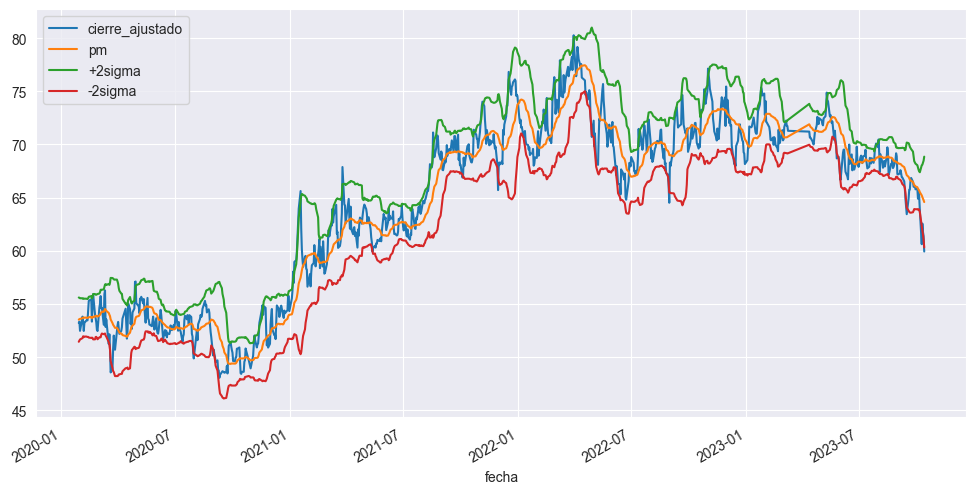

In [191]:
df.plot(figsize=(12,6));

## <font color='navygray'>Calcular posición en el mercado</font>

* Long si PC < $-2\sigma$ del promedio móvil
* Short si PC > $+2\sigma$ del promedio móvil
* Y las posiciones en el "in between"?

#### <font color='navygray'>1. Crear columna nueva</font>

In [192]:
df['posicion'] = np.nan

In [193]:
df

,cierre_ajustado,pm,+2sigma,-2sigma,posicion
fecha,,,,,
2020-01-29,53.207245,53.518648,55.599706,51.437591,NaN
2020-01-30,53.330761,53.566630,55.579418,51.553842,NaN
2020-01-31,52.466145,53.591809,55.531376,51.652241,NaN
2020-02-04,53.801075,53.655943,55.529776,51.782109,NaN
2020-02-05,53.321255,53.710099,55.470577,51.949622,NaN
...,...,...,...,...,...
2023-10-09,60.619999,65.211500,68.035788,62.387212,NaN
2023-10-10,62.560001,65.049500,68.094706,62.004293,NaN
2023-10-11,61.759998,64.895000,68.277671,61.512328,NaN


#### <font color='navygray'>2. Evaluar si el precio de cierre cruza $+2\sigma$</font>

In [194]:
df.loc[df['cierre_ajustado'] > df['+2sigma'], ['posicion']] = -1

#### <font color='navygray'>3. Evaluar si el precio de cierre cruza $-2\sigma$</font>

In [195]:
df.loc[df['cierre_ajustado'] < df['-2sigma'], ['posicion']] = 1

<Axes: xlabel='fecha'>

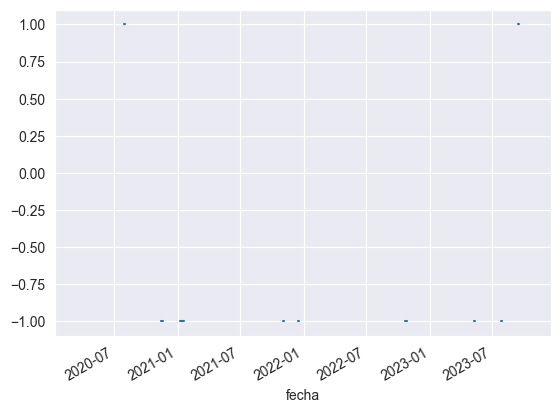

In [196]:
df['posicion'].plot()

#### <font color='navygray'>4. Cambiar todos los **NaN** a la señal inmediata anterior (fill)</font>

In [182]:
df.fillna(method='ffill', inplace=True)

<Axes: xlabel='fecha'>

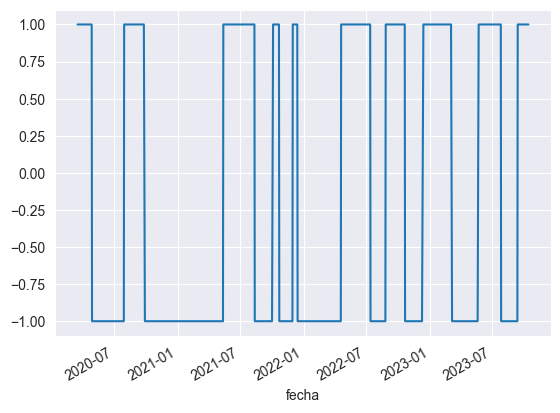

In [183]:
df['posicion'].plot()

In [200]:
df['posicion'].loc[df['posicion']==1].count()

25

## <font color='navygray'>BackTesting</font>

In [201]:
df['ret'] = np.log(df['cierre_ajustado'] / df['cierre_ajustado'].shift(1))
df['ret_estr'] = df['ret'] * df['posicion'].shift()
df.dropna(inplace=True)

In [202]:
df[['ret', 'ret_estr']].sum()

ret         0.176935
ret_estr   -0.319205
dtype: float64

### <font color='navygray'>Balance y caidas</font>

### <font color='navygray'>Balance: Perdidas</font>

### Encontrar pérdida máxima

#### Identificar la mayor perdida

#### Encontrar fecha

#### Identificar valor del pico máximo en la fecha de la mayor perdida

#### Identificar balance en la fecha de la mayor pérdida